# 数式とpython packageの対応関係をとりたい。

# links (あとで整理)



https://tatamiya-practice.hatenablog.com/entry/2020/12/26/150306#fnref:3

https://gist.github.com/apetri/3a171080e9eaa987d4cb

http://pman0214.github.io/blog/fft-rfft.html

https://www.mynote-jp.com/entry/Fourier-transform-of-a-real-function

# 前提
今、$N$点の実数の時系列データ $y(t)$ が与えられている。
ここで
* $n = [0, 1, 2, ..., N-1]$
* $t = [0, \frac{1}{f_s}, \frac{2}{f_s}, ..., \frac{N-1}{f_s}] = [0, t_1, t_2, ..., T_{n-1}]$
である。($f_s$ はサンプリング周波数)

実関数　$y(t)$ の連続フーリエ変換と逆連続フーリエ変換の表式は、
$$
Y(\omega) = \int_{-\infty}^{\infty} y(t) e^{-i\omega t} dt
$$
$$
y(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} Y(\omega) e^{i \omega t} d\omega
$$

実関数 $y(n)$ の離散フーリエ変換と逆離散フーリエ変換は、
$$
Y(k) = \sum_{n=0}^{N-1} y(n) \exp \left( - i \frac{2\pi k}{N} n \right)
$$
$$
y(n) = \frac{1}{N} \sum_{k=0}^{N-1} Y(k) \exp\left( i \frac{2\pi k}{N} t\right)
$$

# PYTHONで見てみる
今、signalを
$$
y(t) = A \sin ( \omega_c t)
$$
* A = 5
* $\omega_c = 3 \pi \times 3$ [Hz] = $6\pi$ [rad/s]
* N = 100
* fs = 20 [Hz]
* T = (N-1)/fs = 4.95
にする。

In [34]:
import numpy as np

A = 5
f_signal = 3                   # 周波数 [Hz]
omega_c = 2*np.pi * 3           # 各振動数 
N = 100                         # 点数
fs = 20                        # サンプリング周波数 [Hz]
T = int(N-1)/fs                      # 作成する長さ [s]


# 時刻の刻みを作成
t = np.arange(N) / fs
# 各時刻のsinを計算
signal = np.sin(omega_c*t)

# np.fft.fftを使う場合

In [50]:
# FFT用の窓
win = np.hamming(N)
signal_nw = signal
signal_win = win * signal

# signalのN点を取り出してFFT
fft_signal_nw = np.fft.fft(signal_nw) #no window
fft_signal_win = np.fft.fft(signal_win)
# FFTの周波数を得る。
fft_freq = np.fft.fftfreq(N, 1/fs)

printすると、半分が負の周波数で、冗長であることが分かる。詳しくはここを見ると良い。
(http://pman0214.github.io/blog/fft-rfft.html)

In [51]:
print('fft_freq ,          fft_signal_win')
print(np.c_[fft_freq, fft_signal_win][:])

fft_freq ,          fft_signal_win
[[ 0.00000000e+00+0.00000000e+00j -9.13275665e-04+0.00000000e+00j]
 [ 2.00000000e-01+0.00000000e+00j -9.17768617e-04-2.82041288e-04j]
 [ 4.00000000e-01+0.00000000e+00j -9.31502528e-04-5.79773409e-04j]
 [ 6.00000000e-01+0.00000000e+00j -9.55280165e-04-9.11135654e-04j]
 [ 8.00000000e-01+0.00000000e+00j -9.90575735e-04-1.29919274e-03j]
 [ 1.00000000e+00+0.00000000e+00j -1.03978286e-03-1.77656768e-03j]
 [ 1.20000000e+00+0.00000000e+00j -1.10667257e-03-2.39317937e-03j]
 [ 1.40000000e+00+0.00000000e+00j -1.19724844e-03-3.23107852e-03j]
 [ 1.60000000e+00+0.00000000e+00j -1.32142876e-03-4.43554653e-03j]
 [ 1.80000000e+00+0.00000000e+00j -1.49664702e-03-6.28729862e-03j]
 [ 2.00000000e+00+0.00000000e+00j -1.75654952e-03-9.39363200e-03j]
 [ 2.20000000e+00+0.00000000e+00j -2.17609554e-03-1.52966599e-02j]
 [ 2.40000000e+00+0.00000000e+00j -2.96795366e-03-2.90541218e-02j]
 [ 2.60000000e+00+0.00000000e+00j -5.13375963e-03-7.83904342e-02j]
 [ 2.80000000e+00+0.0000000

# np.fft.rfftを使う場合

In [52]:
# signalのN点を取り出してFFT
rfft_signal_nw = np.fft.rfft(signal_nw) #no window
rfft_signal_win = np.fft.rfft(signal_win)
# FFTの周波数を得る。
rfft_freq = np.fft.rfftfreq(N, 1/fs)

負の周波数が消えて分かりやすくなっている。

In [53]:
print('rfft_freq ,          rfft_signal_win')
print(np.c_[rfft_freq, rfft_signal_win][:])

rfft_freq ,          rfft_signal_win
[[ 0.00000000e+00+0.00000000e+00j -9.13275665e-04+0.00000000e+00j]
 [ 2.00000000e-01+0.00000000e+00j -9.17768617e-04-2.82041288e-04j]
 [ 4.00000000e-01+0.00000000e+00j -9.31502528e-04-5.79773409e-04j]
 [ 6.00000000e-01+0.00000000e+00j -9.55280165e-04-9.11135654e-04j]
 [ 8.00000000e-01+0.00000000e+00j -9.90575735e-04-1.29919274e-03j]
 [ 1.00000000e+00+0.00000000e+00j -1.03978286e-03-1.77656768e-03j]
 [ 1.20000000e+00+0.00000000e+00j -1.10667257e-03-2.39317937e-03j]
 [ 1.40000000e+00+0.00000000e+00j -1.19724844e-03-3.23107852e-03j]
 [ 1.60000000e+00+0.00000000e+00j -1.32142876e-03-4.43554653e-03j]
 [ 1.80000000e+00+0.00000000e+00j -1.49664702e-03-6.28729862e-03j]
 [ 2.00000000e+00+0.00000000e+00j -1.75654952e-03-9.39363200e-03j]
 [ 2.20000000e+00+0.00000000e+00j -2.17609554e-03-1.52966599e-02j]
 [ 2.40000000e+00+0.00000000e+00j -2.96795366e-03-2.90541218e-02j]
 [ 2.60000000e+00+0.00000000e+00j -5.13375963e-03-7.83904342e-02j]
 [ 2.80000000e+00+0.00000

# Plot
TODをプロット

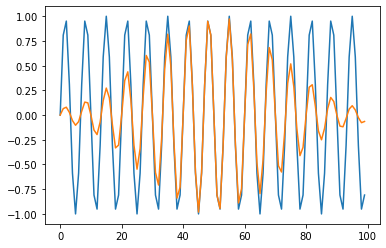

In [54]:
import matplotlib.pyplot as plt
plt.plot(signal_nw, label='signal')
plt.plot(signal_win, label='windowed signal')

# fftをプロット

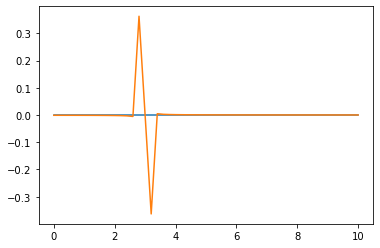

In [57]:
plt.plot(rfft_freq,np.real(rfft_signal_nw), label='signal')
plt.plot(rfft_freq,np.real(rfft_signal_win), label='windowed signal')

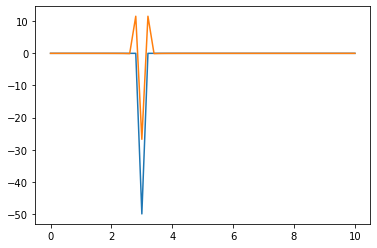

In [58]:
plt.plot(rfft_freq,np.imag(rfft_signal_nw), label='signal')
plt.plot(rfft_freq,np.imag(rfft_signal_win), label='windowed signal')